# Buatlah model CNN untuk klasifikasi dataset MNIST.

In [139]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [140]:
with np.load('mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [141]:
# Pra-pemrosesan data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Menambah dimensi untuk channel (grayscale)
x_test = np.expand_dims(x_test, axis=-1)  # Menambah dimensi untuk channel (grayscale)

# Mengubah label ke bentuk one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [142]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow(x_train, 
                                  y_train,
                                  batch_size=32)

In [143]:
test_datagen = ImageDataGenerator(rescale = 1/.255)
test_set = test_datagen.flow(x_test,
                             y_test,
                             batch_size=32)

In [144]:
cnn = tf.keras.models.Sequential()

In [145]:
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(128, (3,3), activation='relu'))

In [146]:
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [147]:
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
cnn.compile(optimizer='adam', 
            loss=tf.keras.losses.CategoricalCrossentropy,
            metrics=['accuracy'])

In [149]:
# Callback untuk menghentikan pelatihan lebih awal dan mengurangi learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

In [150]:
history = cnn.fit(
    training_set,
    epochs = 50,
    validation_data=test_set,
    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8640 - loss: 0.4121 - val_accuracy: 0.9760 - val_loss: 0.0716 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9728 - loss: 0.0859 - val_accuracy: 0.9825 - val_loss: 0.0558 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9792 - loss: 0.0689 - val_accuracy: 0.9809 - val_loss: 0.0603 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9821 - loss: 0.0568 - val_accuracy: 0.9854 - val_loss: 0.0471 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9866 - val_loss: 0.0448 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9857 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accura

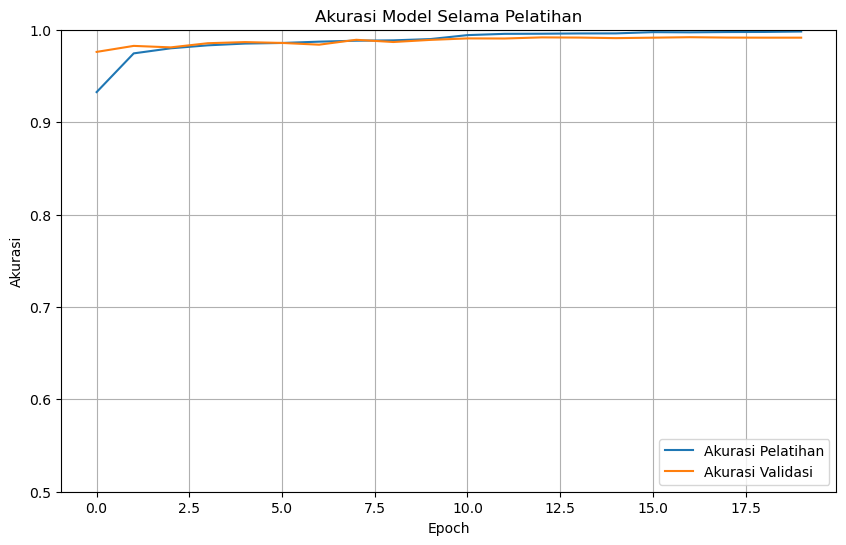

313/313 - 3s - 8ms/step - accuracy: 0.9877 - loss: 0.1370

Loss pada data uji: 0.1370
Akurasi pada data uji: 0.9877


In [151]:
# Plot akurasi pelatihan dan validasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.ylim([0.5, 1])  # Mengatur batas Y
plt.title('Akurasi Model Selama Pelatihan')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Evaluasi model pada data uji
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=2)

# Menampilkan hasil evaluasi
print(f'\nLoss pada data uji: {test_loss:.4f}')
print(f'Akurasi pada data uji: {test_acc:.4f}')